In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../")

## XYTheta Representation in Relation to the Environment

Let's visualize the data in relation to the environment...

In [12]:
import os
from genff.data_handling.cocktail_gan import CocktailGANDataset
from genff.data_handling.simulated_data import SimulatedGANDataset
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from matplotlib import animation, rc
from genff.data_handling.transform import RotateAroundOrigin, TranslateToCentroid, RectangularAngle
import numpy as np
import torch
import time


c = CocktailGANDataset(features="../data/cocktail_party/features.txt",
                       groups="../data/cocktail_party/groups.txt",
                       env="../data/cocktail_party/env_cocktail_party.txt")

In [13]:
print("left: {}m, top: {}m".format(c.environment['left'], c.environment['top'])) # grid's top-left corner coordinates
print("resolution: {}m".format(c.environment['resolution'])) # grid resolution
print("grid shape: {}".format(c.environment['grid'].shape))
plt.imshow(c.environment['grid'])

left: -0.69m, top: -0.65m
resolution: 0.25m
grid shape: (28, 24)


Example 0, Stamp/Individual: ('1275403283.267134', 0)
Individual:
tensor([[ 3.7200,  2.9800, -0.3900]])
Context:
tensor([[ 3.7300,  2.2400, -0.3000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 0., 0., 0., 0., 0.])
Target:
tensor([1.])


Example 1, Stamp/Individual: ('1275403283.267134', 1)
Individual:
tensor([[ 3.7300,  2.2400, -0.3000]])
Context:
tensor([[ 3.7200,  2.9800, -0.3900],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 0., 0., 0., 0., 0.])
Target:
tensor([1.])


Example 2, Stamp/Individual: ('1275403283.267134', 0)
Individual:
tensor([[2.1900, 4.3100, 0.5300]])
Context:
tensor([[ 3.1700,  4.7600,  2.8900],
        [ 2.3900,  5.0700, -1.2500],
        [ 3.5800,  3.8700,  2.2600],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 1., 1., 0., 0., 0.])
Target:
tensor([1.])


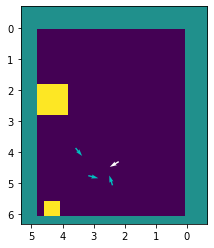

Example 3, Stamp/Individual: ('1275403283.267134', 1)
Individual:
tensor([[3.1700, 4.7600, 2.8900]])
Context:
tensor([[ 2.1900,  4.3100,  0.5300],
        [ 2.3900,  5.0700, -1.2500],
        [ 3.5800,  3.8700,  2.2600],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 1., 1., 0., 0., 0.])
Target:
tensor([1.])


Example 4, Stamp/Individual: ('1275403283.267134', 2)
Individual:
tensor([[ 2.3900,  5.0700, -1.2500]])
Context:
tensor([[2.1900, 4.3100, 0.5300],
        [3.1700, 4.7600, 2.8900],
        [3.5800, 3.8700, 2.2600],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])
Mask:
tensor([1., 1., 1., 0., 0., 0.])
Target:
tensor([1.])


Example 5, Stamp/Individual: ('1275403283.267134', 3)
Individual:
tensor([[3.5800, 3.8700, 2.2600]])
Context:
tensor([[ 2.1900,  4.3100,  0.5300],
        [ 3.1700,  4.7600,  2.8900],
        [ 2.3900,  5.0700, -1.2500],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 1., 1., 0., 0., 0.])
Target:
tensor([1.])


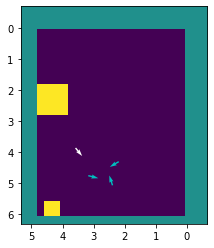

Example 6, Stamp/Individual: ('1275403288.272120', 0)
Individual:
tensor([[ 3.4200,  2.8100, -0.2900]])
Context:
tensor([[3.5300, 2.0700, 0.6200],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])
Mask:
tensor([1., 0., 0., 0., 0., 0.])
Target:
tensor([1.])


Example 7, Stamp/Individual: ('1275403288.272120', 1)
Individual:
tensor([[3.5300, 2.0700, 0.6200]])
Context:
tensor([[ 3.4200,  2.8100, -0.2900],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 0., 0., 0., 0., 0.])
Target:
tensor([1.])


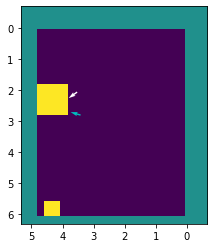

Example 8, Stamp/Individual: ('1275403288.272120', 0)
Individual:
tensor([[2.2000, 4.2900, 0.5200]])
Context:
tensor([[ 3.0500,  4.6300, -2.1200],
        [ 2.3800,  5.0600, -1.4000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 1., 0., 0., 0., 0.])
Target:
tensor([1.])


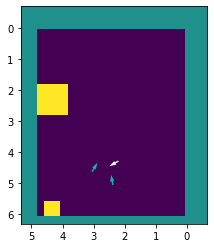

Example 9, Stamp/Individual: ('1275403288.272120', 1)
Individual:
tensor([[ 3.0500,  4.6300, -2.1200]])
Context:
tensor([[ 2.2000,  4.2900,  0.5200],
        [ 2.3800,  5.0600, -1.4000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Mask:
tensor([1., 1., 0., 0., 0., 0.])
Target:
tensor([1.])


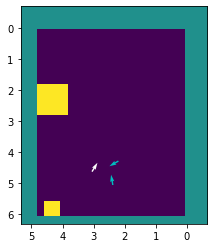

In [14]:
from genff.visualization import plot_sample_on_full_map

for i in range(10):
    (individual, context, mask), y = c[i]
    print("Example {}, Stamp/Individual: {}".format(i, c.labeled_data_stamps[i]))
    print("Individual:\n{}".format(individual))    
    print("Context:\n{}".format(context))   
    print("Mask:\n{}".format(mask))  
    print("Target:\n{}".format(y))
    
    # plot positions changing the resolution (extent in imshow) of the grid image...
    plt.figure()
    plot_sample_on_full_map(individual, context, mask, c.environment['grid'],
                           c.environment['resolution'], c.environment['left'], c.environment['top'])
    plt.show()

### Cropping the environment around the context
Let's try now cropping a chunk of the environment map relative to a given sample...

torch.Size([24, 24, 4])


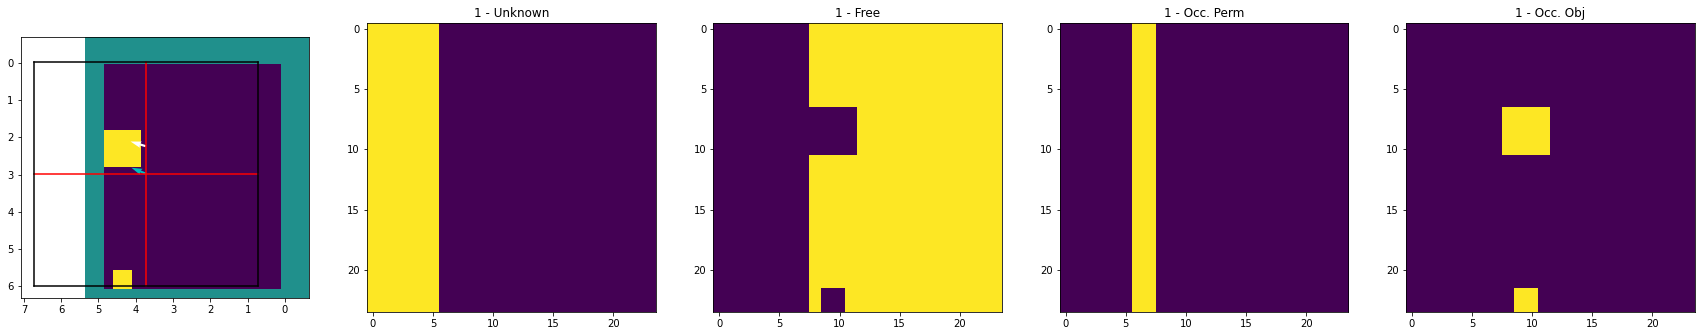

torch.Size([24, 24, 4])


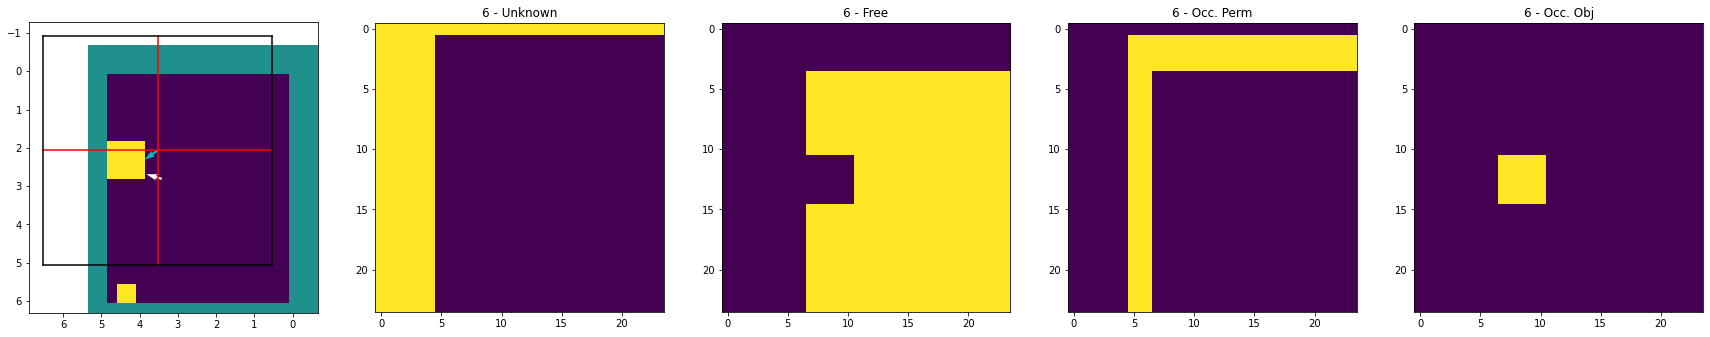

torch.Size([24, 24, 4])


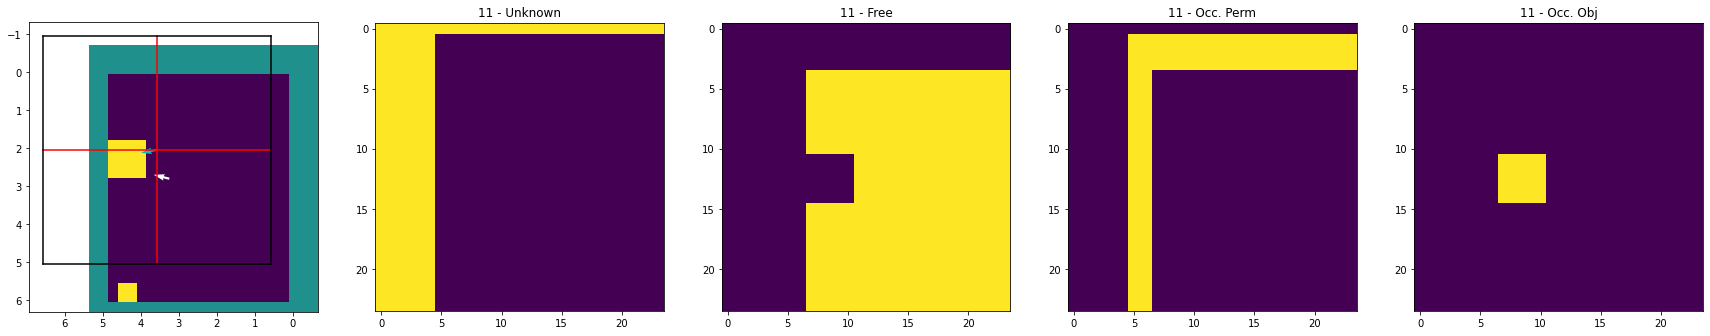

torch.Size([24, 24, 4])


torch.Size([24, 24, 4])


In [26]:
from genff.visualization import plot_sample
from genff.data_handling.cocktail_gan import CocktailEnvGANDataset

c = CocktailEnvGANDataset(features="../data/cocktail_party/features.txt",
                          groups="../data/cocktail_party/groups.txt",
                          env="../data/cocktail_party/env_cocktail_party.txt",
                          crop_radius=3.0)

def plot_env_with_people(ax, individual, context, mask, radius):
    
    plot_sample_on_full_map(individual, context, mask, c.environment['grid'],
                            c.environment['resolution'], c.environment['left'], c.environment['top'],
                            ax=ax)
    group_center = torch.mean(context[mask.bool(), 0:2], axis=0, keepdims=True)
    plt.plot([group_center[0,0] - radius, group_center[0,0] + radius],
             [group_center[0,1], group_center[0,1]],'r-')
    plt.plot([group_center[0,0] , group_center[0,0] ],
             [group_center[0,1]- radius, group_center[0,1]+ radius],'r-')
    plt.plot([group_center[0,0] - radius, group_center[0,0] + radius],
             [group_center[0,1] + radius, group_center[0,1] + radius],'k-')
    plt.plot([group_center[0,0] - radius, group_center[0,0] + radius],
             [group_center[0,1] - radius, group_center[0,1] - radius],'k-')
    plt.plot([group_center[0,0] - radius, group_center[0,0] - radius],
             [group_center[0,1] + radius, group_center[0,1] - radius],'k-')
    plt.plot([group_center[0,0] + radius, group_center[0,0] + radius],
             [group_center[0,1] + radius, group_center[0,1] - radius],'k-')
    
for i in range(1,25,5):
    (individual, context, mask, image), _ = c[i]
    print(image.shape)
    
    f = plt.figure(figsize=(30,100))
    
    ax = f.add_subplot(151)
    plot_env_with_people(ax,
                         individual, context, mask, 
                         radius=c.crop_radius)
    
    ax = f.add_subplot(152)
    ax.imshow(image[:,:,0])
    ax.set_title("{} - Unknown".format(i))
    
    ax = f.add_subplot(153)
    ax.imshow(image[:,:,1])
    ax.set_title("{} - Free".format(i))
    
    ax = f.add_subplot(154)
    ax.imshow(image[:,:,2])
    ax.set_title("{} - Occ. Perm".format(i))
    
    ax = f.add_subplot(155)
    ax.imshow(image[:,:,3])
    ax.set_title("{} - Occ. Obj".format(i))
    
    plt.show()
    

In [23]:
# testing the new dataset with a data loader...
dataloader = torch.utils.data.DataLoader(c, num_workers=1, batch_size=10)

for i in range(3):
    data = next(iter(dataloader))
    print("Example {}".format(i))
    (individual, context, mask, image), y = data
    print("Individual:\n{}".format(individual))    
    print("Context:\n{}".format(context))   
    print("Mask:\n{}".format(mask))  
    print("Target:\n{}".format(y)) 
    print("Image shape:\n{}".format(image.shape))

Example 0
Individual:
tensor([[[ 3.7200,  2.9800, -0.3900]],

        [[ 3.7300,  2.2400, -0.3000]],

        [[ 2.1900,  4.3100,  0.5300]],

        [[ 3.1700,  4.7600,  2.8900]],

        [[ 2.3900,  5.0700, -1.2500]],

        [[ 3.5800,  3.8700,  2.2600]],

        [[ 3.4200,  2.8100, -0.2900]],

        [[ 3.5300,  2.0700,  0.6200]],

        [[ 2.2000,  4.2900,  0.5200]],

        [[ 3.0500,  4.6300, -2.1200]]])
Context:
tensor([[[ 3.7300,  2.2400, -0.3000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 3.7200,  2.9800, -0.3900],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 3.1700,  4.7600,  2.8900],
         [ 2.3900,  5.0700, -1.2500],
         [ 3.5800,  3.8700,  2.26

### Rotating the cropped map

Sample 0 - Scale 1.0


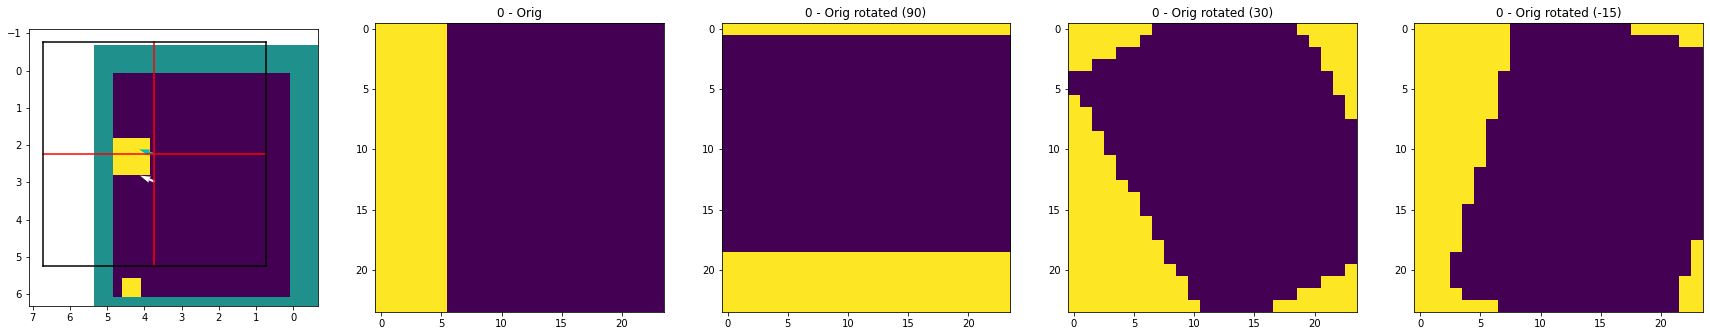

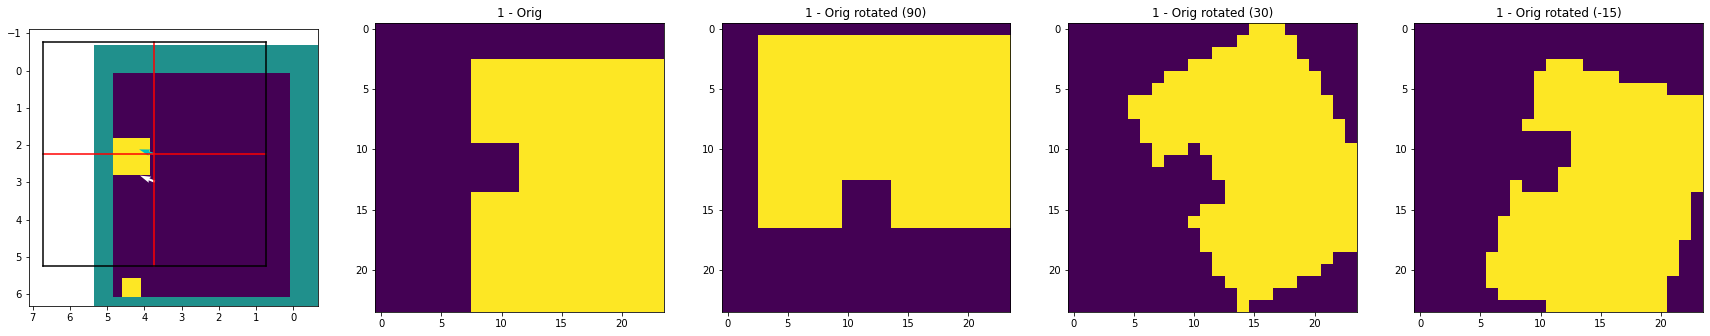

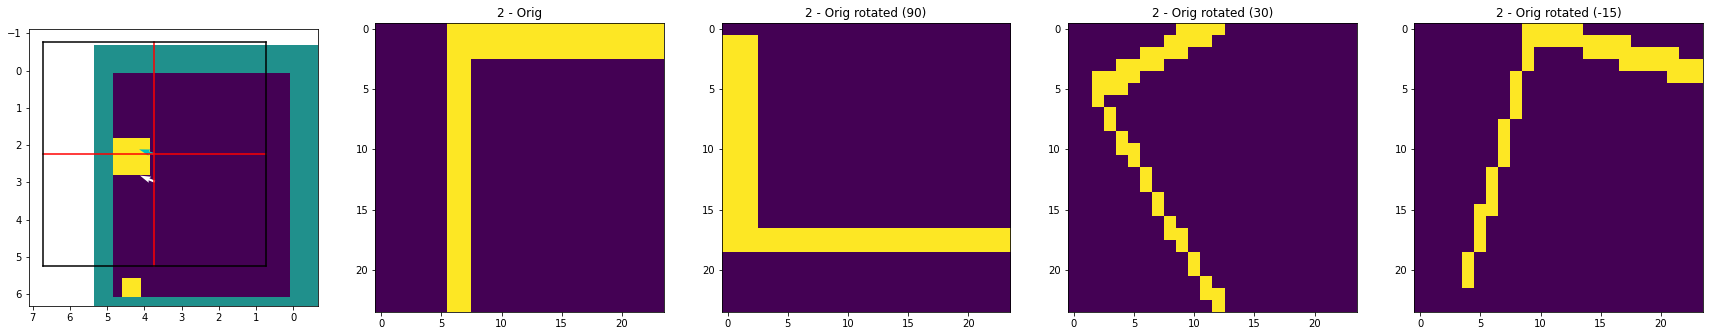

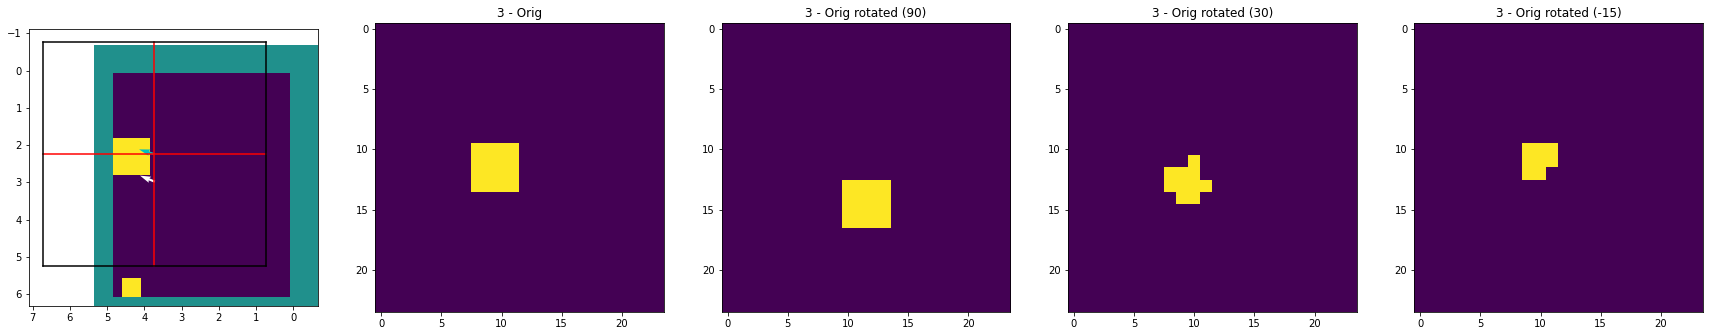

Sample 0 - Scale 2.0


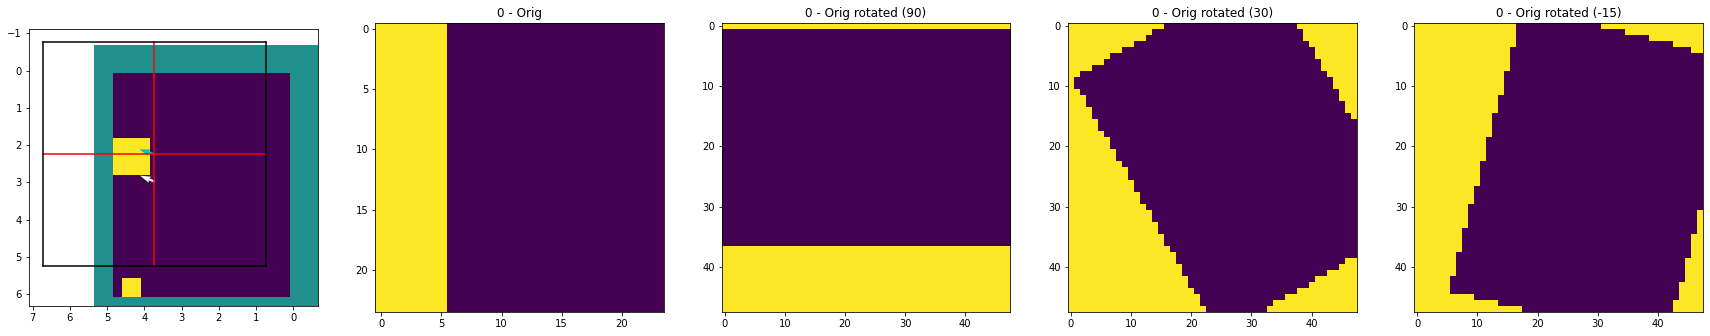

In [27]:
import cv2

def rotate_and_scale_im(image, degrees, scale=1, border=0, dtype=torch.float32):
    """Example on rotating a map. The key parameter is border (we want it to be 1 for unknown ch, 0 otherwise)"""
    
    scale = int(scale) # safety conversion in case scale is passed as a float
    
    if scale > 1:
        # scale the image
        im = image.numpy()
        im = cv2.resize(im, (im.shape[0]*scale, im.shape[1]*scale), interpolation = cv2.INTER_AREA)
    else:
        # leave scale as is
        im = image.numpy()
    
    h, w = im.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, degrees, 1.0)
    rotated = cv2.warpAffine(im, M, (w, h), 
                             flags=cv2.INTER_LINEAR, 
                             borderMode=cv2.BORDER_CONSTANT, 
                             borderValue=border)

    return torch.from_numpy(rotated.astype(int)).to(dtype)

def plot_rotated(individual, context, mask, index, scale=1.0):
    f = plt.figure(figsize=(30,100))
    
    ax = f.add_subplot(151)
    plot_env_with_people(ax,
                         individual, context, mask, 
                         radius=c.crop_radius)
    
    ax = f.add_subplot(152)
    ax.imshow(im[:,:,index])
    ax.set_title("{} - Orig".format(index))
    
    ax = f.add_subplot(153)
    ax.imshow(rotate_and_scale_im(im[:,:,index], 90, scale=scale, border=1 if index == 0 else 0))
    ax.set_title("{} - Orig rotated (90)".format(index))
    
    ax = f.add_subplot(154)
    ax.imshow(rotate_and_scale_im(im[:,:,index], 30, scale=scale, border=1 if index == 0 else 0))
    ax.set_title("{} - Orig rotated (30)".format(index))
    
    ax = f.add_subplot(155)
    ax.imshow(rotate_and_scale_im(im[:,:,index], -15, scale=scale, border=1 if index == 0 else 0))
    ax.set_title("{} - Orig rotated (-15)".format(index))
    

for i in range(1):
    (individual, context, mask, im), _ = c[i]
    
    print("Sample {} - Scale 1.0".format(i))
    plot_rotated(individual, context, mask, 0, scale=1.0)
    plot_rotated(individual, context, mask, 1, scale=1.0)
    plot_rotated(individual, context, mask, 2, scale=1.0)
    plot_rotated(individual, context, mask, 3, scale=1.0)
    plt.show()
    print("Sample {} - Scale 2.0".format(i))
    plot_rotated(individual, context, mask, 0, scale=2.0)
    plot_rotated(individual, context, mask, 1, scale=2.0)
    plot_rotated(individual, context, mask, 2, scale=2.0)
    plot_rotated(individual, context, mask, 3, scale=2.0)
    plt.show()
    

In [10]:
# extra code for visualizing poster session data
import matplotlib.pyplot as plt
import json
import numpy as np

with open('../data/salsa/env_poster_session.txt', 'r') as fid:
    env_data = fid.read()
    environment = json.loads(env_data)
    environment['grid'] = np.asarray(environment['grid'])

plt.imshow(environment['grid'])